In [43]:
# Data management
import pandas as pd
import pickle

# Data preprocessing and trasformation (ETL)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml, load_iris, make_moons, make_classification


# Math and Stat modules
import numpy as np
from scipy.stats import sem
from random import choice

# Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Unsupervised Learning

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.tree import export_graphviz
%matplotlib inline

In [42]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_decision(ax, clf, X, y, **params):
    x0, x1 = X[:, 0], X[:, 1]
    print(x1)
    xx, yy = make_meshgrid(x0, x1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [2]:
X, y, columns_name = [ pickle.load(open('credit_card.pkl','rb'))[k] for k in ['features','labels','columns']]

In [3]:
iris_data = load_iris()
X_iris = iris_data['data'][:,2:]
y_iris = (iris_data["target"] == 0).astype(np.int)

In [12]:
iris_data['data'][:,2:].shape

(150, 2)

## Support Vector Machines
Support Vector Machine - SVM - sono un modello molto performante e versatile nell'ambito del ML. Utilizzate per la classificazione lineare e non lineare, la regression e persino l'identificazione di outlier - outlier detection.

In Scikit-learn SVMs sono implementate dalle classi **SVC** e **LinearSVC** contenute nel modulo **svm**.

In [52]:
setosa_or_versicolor = (y_iris == 0) | (y_iris == 1)
X_iris_2 = X_iris[setosa_or_versicolor]
y_iris_2 = y_iris[setosa_or_versicolor]

# SVM Classifier model
svm_clf = LinearSVC(C=200, max_iter=50000)
svm_clf.fit(X_iris_2, y_iris_2)

LinearSVC(C=200, max_iter=50000)

(0.0, 5.5, 0.0, 2.0)

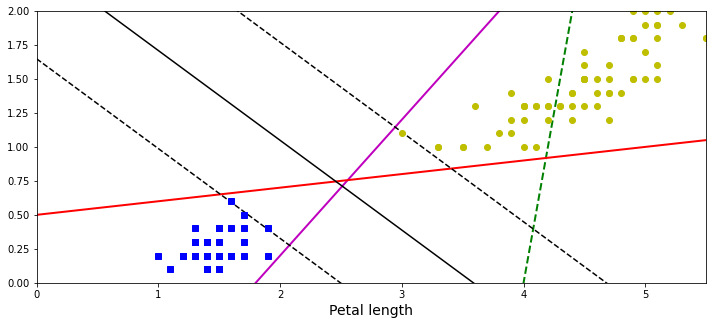

In [55]:
xx = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(ax, svm_clf, xx):
    w = svm_clf.coef_[0]
    a = -w[0] / w[1]
    yy = a * xx - (svm_clf.intercept_[0]) / w[1]
    
    margin = 1 / np.sqrt(np.sum(svm_clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.plot(x0, pred_1, "g--", linewidth = 2, label='Separazione 1')
ax.plot(x0, pred_2, "m-", linewidth = 2, label='Separazione 2')
ax.plot(x0, pred_3, "r-", linewidth = 2, label='Separazione 3')
plot_svc_decision_boundary(ax, svm_clf, xx)
ax.plot(X_iris_2[:, 0][y_iris_2==1], X_iris_2[:, 1][y_iris_2==1], "bs")
ax.plot(X_iris_2[:, 0][y_iris_2==0], X_iris_2[:, 1][y_iris_2==0], "yo")
ax.set_xlabel("Petal length", fontsize=14)
ax.axis([0, 5.5, 0, 2])

Le due classi sono linearmente separabili e esiste un ricco insieme di iperpiano separatori, tra cui quelli rossi e viola in figura. Tuttavia le ultime sono molto vicine alle classi del training set, ponendo limitazioni sulle performance sul validationa e test set. In neretto sono stati riportati 
l'iperpiano identificato da SVM e i margini identificati.

Nel caso del dataset Iris, la separazione e' ben evidente, cosi' come la la classificazione mediante hard margin e support vector. Nel caso di un sottoinsieme di feature del nostro dataset di esempio, si ottengono risultati molto meno significativi.

In [57]:
X_subset = X[:,[20,27]]
# SVM Classifier model
svm_clf = LinearSVC(C=1, max_iter=50000)
svm_clf.fit(X_subset, y)

LinearSVC(C=1, max_iter=50000)

[-1.32693191 -1.32693191 -1.32693191 ...  0.65203194  0.65203194
 -0.33744998]


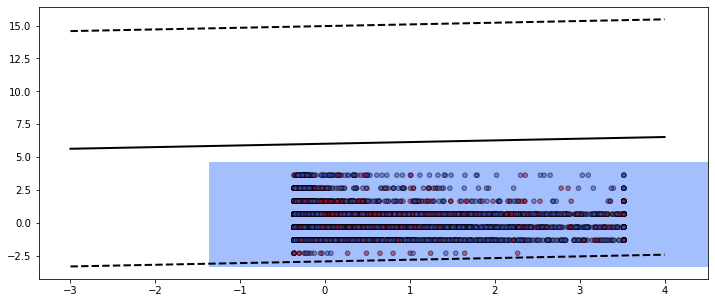

In [56]:
ax = plt.figure(figsize=(12,5)).add_subplot()
plot_decision(ax, svm_clf, X_subset, y ,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x0 = np.linspace(-3, 4, 200)
iperpiano_sep = -w[0]/w[1] * x0 - b/w[1]
margine = 1/w[1]
margine_up = iperpiano_sep + margine
margine_down = iperpiano_sep - margine
ax.plot(x0, iperpiano_sep, "k-", lw=2)
plt.plot(x0, margine_up, "k--", lw=2)
plt.plot(x0, margine_down, "k--", lw=2)

Il metodo di hard margin classification funziona solamente se le classi sono linearmente separabili ed e' sensibile agli outlier.<br>
Nell'esempio vediamo l'effetto di instanze outlier.

(-2.0, 2.0, -2.0, 2.0)

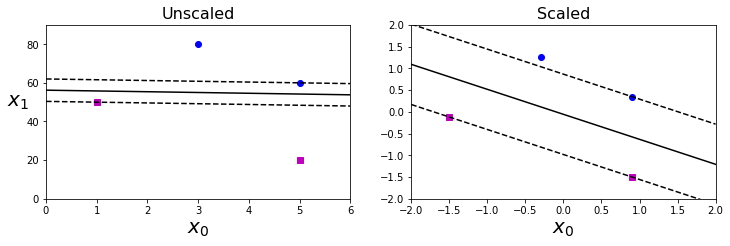

In [61]:
#Dataset esempio con outlier
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
#Training
svm_clf = SVC(kernel='linear',C=100)
svm_clf.fit(Xs, ys)

fig = plt.figure(figsize=(12,3.2))
ax1 = fig.add_subplot(121)
ax1.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
ax1.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(ax1, svm_clf, np.linspace(0,6,100))
ax1.set_xlabel("$x_0$", fontsize=20)
ax1.set_ylabel("$x_1$  ", fontsize=20, rotation=0)
ax1.set_title("Unscaled", fontsize=16)
ax1.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)
ax2 = fig.add_subplot(122)
ax2.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
ax2.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(ax2, svm_clf, np.linspace(-2,2,100))
ax2.set_xlabel("$x_0$", fontsize=20)
ax2.set_title("Scaled", fontsize=16)
ax2.axis([-2, 2, -2, 2])

Per questo vengono introdotte nel modello le variabilie di slack che misurano il livello di violazione del margine. Si deve quindi ottimizzare il margine e allo stesso stempo ridurre il numero di violazioni - interessi contropposti.

Attraverso il parametro $C$ posso controllare il trade-off ampiezza del margine e numero di violazioni. Se diminuisco il valore di C privilegio il margine e aumento il numero di violazioni, evitando piu' probabilmente overfitting. Se aumento C ho la situazione opposta e posso incappare piu' facilmente in overfitting.

Nel caso delle carte di credito, l'effetto del parametro C non e' molto apprezzabile, se non ininfluente.

0 0.01
Training per 0.01 finito
1 1
Training per 1 finito
2 50
Training per 50 finito


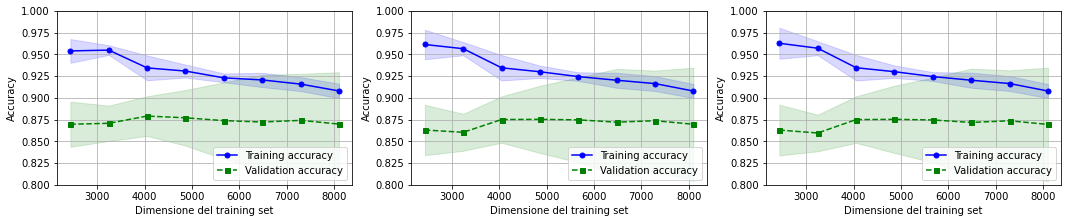

In [70]:
Cs = [0.01, 1, 50]
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print(i,c)
    clf = LinearSVC(C=c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(clf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(130+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

### Nonlinear SVM

Molti dataset non sono linearmente separabili. Un approccio per gestire la non linearita' e' la creazione di feature polinomiali. Il problema che introducendo feature polinomiali con alto grado del polinomio introduce un elevato numero di feature aggiuntive che rendono il processo di training computazionalmente oneroso. Nel caso delle SVM non esiste la necessita' di creare delle feature nuove dal momento che si puo' utilizzare il kernel trick (vedi formulazione duale del problema di ottimizzazione quadratica). Attraverso il kernel trick non ho un'esplosione di feature e posso introdurre non linearita'.

Vediamo come applicare SVM non lineari.

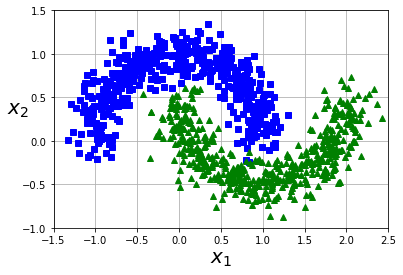

In [4]:
X_moon, y_moon = make_moons(n_samples=1000, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X_moon[:, 0][y_moon==0], X_moon[:, 1][y_moon==0], "bs")
    plt.plot(X_moon[:, 0][y_moon==1], X_moon[:, 1][y_moon==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.show()

In [6]:
poly3_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly3_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Posso aumentare il grado del polinomio ma potrei aumentare la probabilita' di overfitting

In [12]:
poly6_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=5, C=5))
    ])
poly6_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=5, degree=6, kernel='poly'))])

Text(0.5, 1.0, '$d=10, r=5, C=5$')

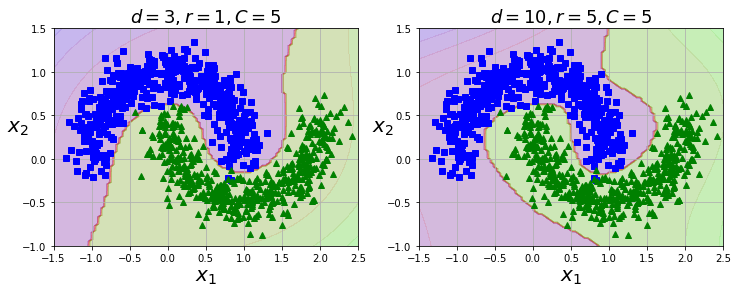

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(poly3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=5, C=5$", fontsize=18)

Il coefficiente _coef0_ amplifica gli effetti delle feature con alto degree. Anche in qeusto caso ha influenza su overfitting

In [19]:
poly6_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=1, C=5))
    ])
poly6_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=6, kernel='poly'))])

In [14]:
poly6_10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=10, C=5))
    ])
poly6_10_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=10, degree=6, kernel='poly'))])

Text(0.5, 1.0, '$d=6, r=10, C=5$')

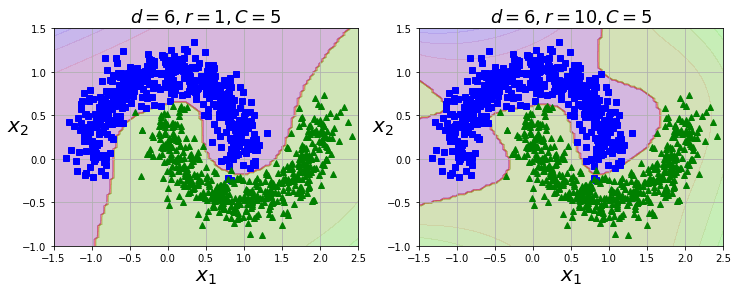

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(poly6_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=6, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly6_10_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=6, r=10, C=5$", fontsize=18)

Una seconda opzione per gestire la non linearita' e' aggiungere feature calcolate utilizzando una funzione di similarita'che misura quanto un'istanza $\mathbf{x}$ e' simile ad un landmark $\mathbf{l}$. Per esempio, una funzione utilizzata e' Gaussian Radial Basis Function - RBF.
$$\phi(\mathbf{x},\mathbf{l}) = exp(-\gamma||\mathbf{x}-\mathbf{l}||^2)$$
Ottengo una forma a campana che assume valori tra 0 (punti distanti e dissimili) e 1 (punti uguali) con $\gamma$ che agisce sulla dispersione della campana. Diminuendo $\gamma$ aumento la dispersione e punti piu' lontani sono considerati piu' simili al landmark, rispetto ad un $\gamma$ piu' piccolo.

Nel nostro caso i landmark corrispondono a tutte le istanze del dataset - *m* - e se applicassi RBF senza kernel trick otterrei *m* features e di conseguenza una matrice *m* x *m*. 

Anche in questo caso vale il kernel trick e in SKL posso utilizzare la solita classe **SVC**.

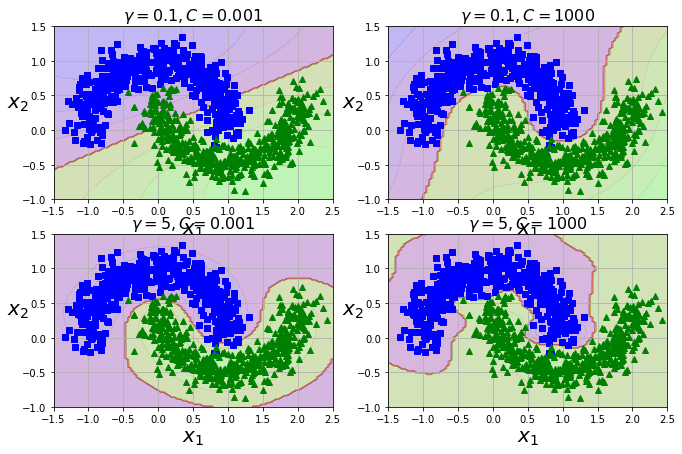

In [23]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X_moon, y_moon)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

In [25]:
gamma1, gamma2 = 0.1, 2
C1, C2 = 0.01, 5
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma = gamma, C = C)
    train_size, train_scores, test_scores = learning_curve(rbf_kernel_svm_clf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {},{}'.format(gamma,C))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 0.1,0.01
fatto 0.1,5
fatto 2,0.01
fatto 2,5


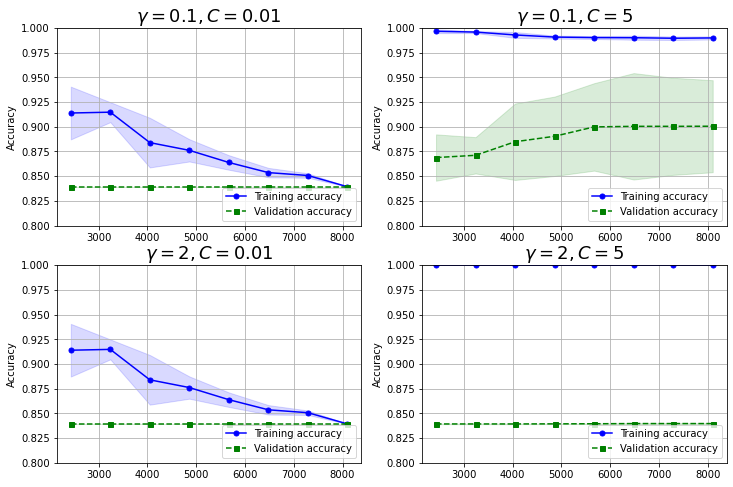

In [33]:
fig= plt.figure(figsize=(12, 8))
for i in range(4):
    ax = fig.add_subplot(221+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

### Computational Complexity
**LinearSVC** utilizza la libreria liblinear che implementa un algoritmo ottimizzato per SVM lineari. La complessita' del training e' $O(mn)$ dove $m$ e' il numero di feature e $n$ il numero di istanze.

**SVC** utilizza la libreria libsvm e i tempi di computazione variano $O(m^2n)$ a $O(m^3n)$, rendendo SVM un classificatore per dataset complessi ma di dimensione piccola e media (max 100K istanze)

## Decision Tree
I decision tree sono un secondo strumento piuttosto versatile per problemi di classificazione e regressione. Inoltre sono una componente fondamentale per Random Forest. 
Decision Trees can perform both classification and regression. They are a fundamental components of Random Forests. Moreover they do not require feaure scaling.

Negli esempi utilizzeremo il dataset Iris per evidenziare le peculiarita' dell'approccio e il dataset delle carte di credito per testare le performance su un caso d'uso.

In [35]:
iris_data = load_iris()
X_iris = iris_data['data'][:,2:]
y_iris = iris_data["target"]

In SKL, i decision tree per la classificazione sono implementati dalla classe **DecisionTreeClassifier**. 

In [39]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

La struttura del decision tree addestrato e' visualizzabile mediante il metodo **export_graphviz()**, il quale crea un file .dot. E' possibile convertire il file .dot in immagine o pdf mediante l'utility Graphviz (https://graphviz.org/download/) e da prompt dei comandi digitare
```
dot -Tpng <file>.dot -o <file>.png


In [40]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris_data.feature_names[2:],
        class_names=iris_data.target_names,
        rounded=True,
        filled=True
    )

![](iris_tree.png)

### Making predictions
Uno dei vantaggi di DT e' la leggiblita' del modello (White Box) che indica come il classificatore esegue una predizione. Partendo dalla radice dell'albero, ci chiediamo se la lunghezza del petalo e' minore di 2.45. In caso positivo, ci spostiamo nel figlio sinistro, ed essendo una foglia restituiamo la classe del nodo. Nel caso di petalo con lunghezza maggiore di 2.45, dobbiamo verificare una secondo condizione sulla larghezza del petalo e in base alla misura prediciamo una classe rispetto all'altra.

L'attributo **samples** indica a quante istanze del training set si applica la condizione. La somma dei valori samples dei figli deve coincidere con il valore samples del padre. 

L'attributo **value** indica a quante istanze di una classe, si applica la condizione del nodo. La somma deve corrispondere al valore samples del nodo.

L'attributo **gini**  indica il valore di Gini impurity per quel nodo. Se $G = 0$, il nodo e' puro, quindi il nodo si applica ad una sola classe. 

**Gini impurity**
$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2$$
dove $p_{i,k}$ e' il rapporto tra il numero di istanze della classe $k$ in quel nodo e il valore di sample del nodo $i$.

Possiamo anche definire le aree di decisione identificate

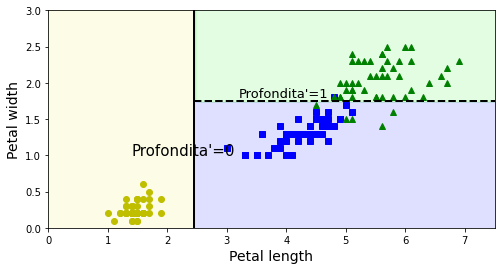

In [45]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X_iris, y_iris)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Profondita'=0", fontsize=15)
plt.text(3.2, 1.80, "Profondita'=1", fontsize=13)

plt.show()

### Estimating class probabilities
Un DT stima anche la probabilita' 
A Decision Tree can also estimate the probability that an instance belongs to a particular class $k$: first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class $k$ in this node. For example

In [16]:
print(tree_clf.predict_proba([[5, 1.5]]))
tree_clf.predict([[5, 1.5]])[0]

[[0.         0.90740741 0.09259259]]


1

## The CART training algorithm
Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees. The algorimthm first splits the training set in two subsets using a single feature $k$ and a threshold $t_k$, searching for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is
$$J(k,t_k) = \frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$$
where G_{.} measures the impurity of the left/right subset and m_{.} is the number of instances in the left/right subset.

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the subsubsets and so on, recursively. 

It stops recursing once it reaches the maximum depth - **max_depth** hyperparameter -, or if it cannot find a split that will reduce impurity.

**NB:** CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.


### Entropy or impurity
By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the **criterion** hyperparameter to "entropy". In Machine Learning, it is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.
$$H_{i} = - \sum_{k=1}^{n}p_{i,k}log(p_{i,k})$$

### Regularization Hyperparameters
Decision Trees make very few assumptions about the training data. If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely **overfitting** it. To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training, i.e. use **regularization**. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. In Scikit-learn, this is controlled by the **max_depth** hyperparameter. Reducing max_depth will regularize the model and thus reduce the risk of overfitting.
The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree: 
- **min_samples_split**: the minimum number of samples a node must have before it can be
split
- **min_samples_leaf**: the minimum number of samples a leaf node must have,
- **min_weight_fraction_leaf**: same as min_samples_leaf but expressed as a fraction of the total
number of weighted instances
- **max_leaf_nodes**: maximum number of leaf nodes
- **max_features**: maximum number of features that are evaluated for splitting at each node.

Increasing min_ hyperparameters or reducing max_ hyperparameters will regularize the model.

Here we see the effect of the parameter min_sample_leaf on the moon dataset.

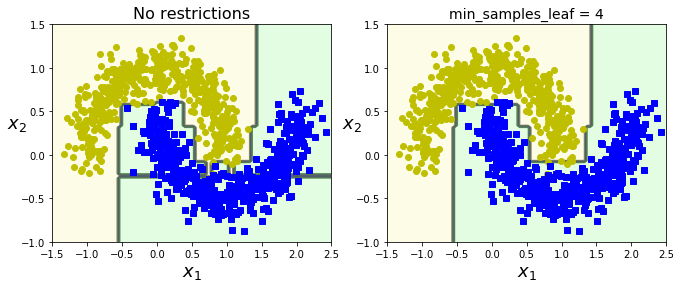

In [17]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(X_moon, y_moon)
deep_tree_clf2.fit(X_moon, y_moon)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, X_moon, y_moon, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, X_moon, y_moon, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

### Instability
The main issue with Decision Trees is that they are very sensitive to small variations in
the training data.

Remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree.

In [101]:
X_iris[(X_iris[:, 1]==X_iris[:, 1][y_iris==1].max()) & (y_iris==1)]

array([[4.8, 1.8]])

In [102]:
not_widest_versicolor = (X_iris[:, 1]!=1.8) | (y_iris==2)
X_tweaked = X_iris[not_widest_versicolor]
y_tweaked = y_iris[not_widest_versicolor]
print(X_tweaked.shape)
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

(149, 2)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

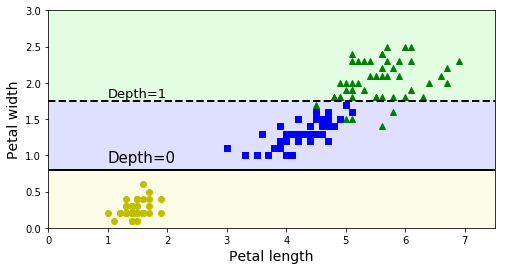

In [103]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

It's very different from the previous Decision Tree.

## Ensemble learning and Random  Forest

If you aggregate the predictions of a group of predictors, you will often get better predictions than with the best individual predictor. A group of predictors is called an _ensemble_; thus, this technique is called _Ensemble Learning_, and an Ensemble Learning algorithm is called an _Ensemble method_.

For example a Random Forest is basically a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you just obtain the predictions of all individual trees, then predict the class that gets the most votes.

**Pratical tip**: you will often use Ensemble methods near the end of a project, once you have already built a few good predictors, to combine them into an even better predictor.

### Voting classifier
Now we train a few classifiers. We create a new  classifier by aggregating the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a **hard voting classifier**. 
![](images/voting_scheme.png)
This voting classifier often achieves a higher accuracy than the best classifier in
the ensemble. In fact, even if each classifier is a _weak learner_ (slightly better than random guessing), the ensemble can still be a _strong learner_, provided there are a sufficient number of weak learners and they are sufficiently diverse.

We compose three diverse classifiers by the class **VotingClassifier**.
- the set of estimator, **estimators** parameter, is represented by a list of tuple (string, Classifier)
- the aggregation of the prediction is specified by the **voting** parameter

In [115]:
Xmoon_train, Xmoon_test, ymoon_train, ymoon_test = train_test_split(X_moon, y_moon, random_state=42)

In [105]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [106]:
voting_clf.fit(Xmoon_train, ymoon_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [109]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(Xmoon_train, ymoon_train)
    ymoon_pred = clf.predict(Xmoon_test)
    print(clf.__class__.__name__, f1_score(ymoon_test, ymoon_pred))

LogisticRegression 0.8653061224489798
RandomForestClassifier 0.95
SVC 0.9377593360995851
VotingClassifier 0.9333333333333333


If all classifiers are able to estimate class probabilities (i.e., they have a **predict_proba()** method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called **soft voting**. It often achieves higher performance than hard voting because it gives more weight to highly confident votes. All you need to do is replace voting="hard" with voting="soft" and ensure that all classifiers can estimate class probabilities.

This is not the case of the SVC class by default, so you need to set its probability hyperparameter to True (this will make the SVC class use cross-validation to estimate class probabilities, slowing down training, and it will add a predict_proba() method).

In [116]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(Xmoon_train, ymoon_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [118]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(Xmoon_train, ymoon_train)
    ymoon_pred = clf.predict(Xmoon_test)
    print(clf.__class__.__name__, accuracy_score(ymoon_test, ymoon_pred))

LogisticRegression 0.88
RandomForestClassifier 0.996
SVC 0.988
VotingClassifier 0.988


### Bagging and Pasting

One way to get a diverse set of classifiers is to use very different training algorithms.
Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called **bagging** (bootstrap aggregating). When sampling is performed without replacement, it is called **pasting**. Both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.
![](images/bagging.png)
Once all predictors are trained, the ensemble can make a prediction for a new instance by simply
aggregating the predictions of all predictors. The aggregation function is typically the _mode_  for classification.

Predictors can all be trained in parallel, via different CPU cores or even different servers. Similarly, predictions can be made in parallel. This is one of the reasons why bagging and pasting are such popular methods: they scale very well.

Scikit-Learn offers a simple API for both bagging and pasting with the **BaggingClassifier** class. 

Here we train an ensemble of 500 Decision Tree classifiers, each trained on 100 training instances randomly sampled from the training set with replacement (this is an example of bagging, but if you want to use pasting instead, just set **bootstrap=False**). The **n_jobs** parameter tells Scikit-Learn the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores).

In [279]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(Xmoon_train, ymoon_train)
ymoon_pred = bag_clf.predict(Xmoon_test)

In [280]:
print(accuracy_score(ymoon_test, ymoon_pred))

0.988


We can compare the decision boundary of a single Decision Tree with the decision boundary of a
bagging ensemble of 500 trees (from the preceding code), both trained on the moons dataset.

In [282]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(Xmoon_train, ymoon_train)
ymoon_pred_tree = tree_clf.predict(Xmoon_test)
print(accuracy_score(ymoon_test, ymoon_pred_tree))

0.992


In [283]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

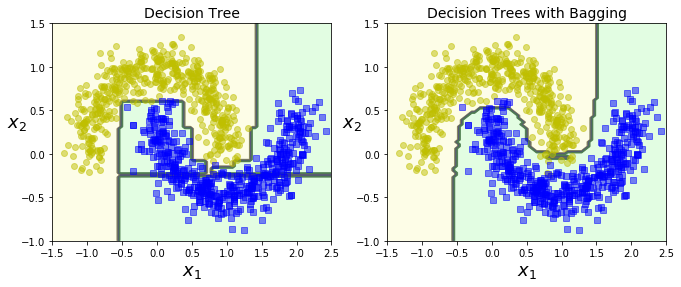

In [284]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X_moon, y_moon)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X_moon, y_moon)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

### Out-of-Bag Evaluation
With bagging, some instances may be sampled several times for any given predictor, while others may notbe sampled at all. By default a BaggingClassifier samples m training instances with replacement (bootstrap=True), where m is the size of the training set. The remaining of the training instances that are not sampled are called **out-of-bag (oob)** instances.
Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation. 

You can evaluate the ensemble itself by averaging out the oob evaluations of each predictor.
In Scikit-Learn, you can set **oob_score=True** when creating a BaggingClassifier to request an
automatic oob evaluation after training. The resulting evaluation score is available through the **oob_score_** attribute.

In [44]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42, oob_score=True)

In [45]:
bag_clf.fit(Xmoon_train, ymoon_train)
y_pred = bag_clf.predict(Xmoon_test)

In [46]:
bag_clf.oob_score_

0.9866666666666667

The oob decision function for each training instance is also available through the
**oob_decision_function_** variable. In this case (since the base estimator has a predict_proba()
method) the decision function returns the class probabilities for each training instance.

In [47]:
bag_clf.oob_decision_function_

array([[0.82524183, 0.17475817],
       [0.13286492, 0.86713508],
       [0.98181118, 0.01818882],
       ...,
       [0.9602869 , 0.0397131 ],
       [0.8068431 , 0.1931569 ],
       [0.04372971, 0.95627029]])

The BaggingClassifier class supports sampling the features as well. This is controlled by two
hyperparameters: **max_features** and **bootstrap_features**. They work the same way as max_samples and bootstrap, but for feature sampling instead of instance sampling. Thus, each predictor will be trained on a random subset of the input features.
This is particularly useful when you are dealing with high-dimensional inputs (such as images). Sampling both training instances and features is called the _Random Patches_ method. Keeping all training instances (i.e., bootstrap=False and max_samples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_features smaller than 1.0) is called the _Random Subspaces_ method.

### Random Forest
As we have discussed, a Random Forest is an ensemble of Decision Trees, generally trained via the
bagging method (or sometimes pasting), typically with max_samples set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the **RandomForestClassifier** class, which is more convenient and optimized for Decision Trees.

A RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

### Extra-Tree
When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting (as discussed earlier). It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds. A forest of such extremely random trees is simply called an _Extremely Randomized Trees_ ensemble or _Extra-Trees_. 

It makes Extra-Trees much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.

You can create an Extra-Trees classifier using Scikit-learn’s **ExtraTreesClassifier** class. Its API is identical to the RandomForestClassifier class. Similarly, the ExtraTreesRegressor class has the same API as the RandomForestRegressor class.

#### Feature Importance
Lastly, if you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest. 

Scikit-learn computes this automatically for every feature after training. You can access the result using the **feature_importances_** variable.

In [285]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_iris, y_iris)
for name, score in zip(iris_data["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.5205417010676754
sepal width (cm) 0.47945829893232456


In [211]:
rnd_clf.feature_importances_

array([0.5205417, 0.4794583])

If you train a Random Forest classifier on the MNIST dataset

In [213]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

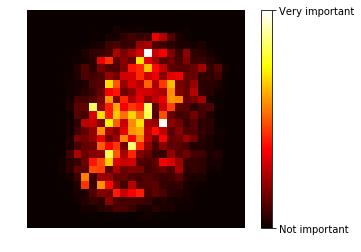

In [214]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()